In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/monthly-sales-2019/Sales_June_2019.csv
/kaggle/input/monthly-sales-2019/Sales_May_2019.csv
/kaggle/input/monthly-sales-2019/Sales_February_2019.csv
/kaggle/input/monthly-sales-2019/Sales_September_2019.csv
/kaggle/input/monthly-sales-2019/Sales_October_2019.csv
/kaggle/input/monthly-sales-2019/Sales_November_2019.csv
/kaggle/input/monthly-sales-2019/Sales_March_2019.csv
/kaggle/input/monthly-sales-2019/Sales_July_2019.csv
/kaggle/input/monthly-sales-2019/Sales_December_2019.csv
/kaggle/input/monthly-sales-2019/Sales_August_2019.csv
/kaggle/input/monthly-sales-2019/Sales_January_2019.csv
/kaggle/input/monthly-sales-2019/Sales_April_2019.csv


Merge different files together

In [2]:
import pandas as pd
import glob
import os
df = pd.read_csv('../input/monthly-sales-2019/Sales_January_2019.csv')
df.head()

path =r'../input/monthly-sales-2019'                    
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)
concatenated_df.to_csv('all_data.csv')

**Cleaning data - Removing Nan Values**

In [3]:
df = pd.read_csv('./all_data.csv')
#df.head()
new_data = df.dropna(axis = 0, how ='any') 

**Month Wise Sales - Which was the best month for sales**

**Add Month and Total Sale Columns**

In [4]:
new_data.head()
#print(new_data.columns)
Or = new_data[new_data['Order Date'].str [0:2] != 'Or']
new_data['month'] = Or['Order Date'].str[0:2].astype('int')
#new_date['Sale'] = pd.to_numeric(new_data['Price Each']) * pd.to_numeric(new_data['Quantity Ordered'])
new_data_nan = new_data[new_data.isna().any(axis=1)]
new_data = new_data.dropna()

new_data['Price Each'] = pd.to_numeric(new_data['Price Each'])
new_data['Quantity Ordered'] = pd.to_numeric(new_data['Quantity Ordered'])
new_data['Sale'] = new_data['Price Each']* new_data['Quantity Ordered']
new_data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sale
0,0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6.0,11.95
1,1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6.0,1700.00
2,2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6.0,999.99
3,3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6.0,149.99
4,4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6.0,99.99


**Month Wise Grouping**

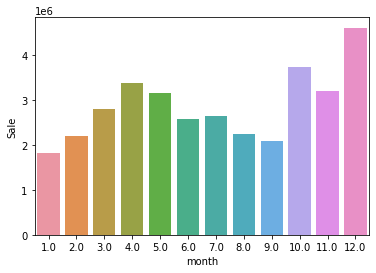

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
pd = new_data.groupby('month',as_index=False).sum()
sns.barplot(x='month',y='Sale',data=pd)

**Best Cities for 2019 sales **

**Create City,State Column**

In [6]:
new_data['city']= new_data['Purchase Address'].apply(lambda x:x.split(",")[1]+' '+(x.split(",")[2]).split()[0])
new_data.head()


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sale,city
0,0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6.0,11.95,Portland ME
1,1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6.0,1700.00,San Francisco CA
2,2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6.0,999.99,Los Angeles CA
3,3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6.0,149.99,Seattle WA
4,4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6.0,99.99,San Francisco CA


**Group by city name and visualise the result**

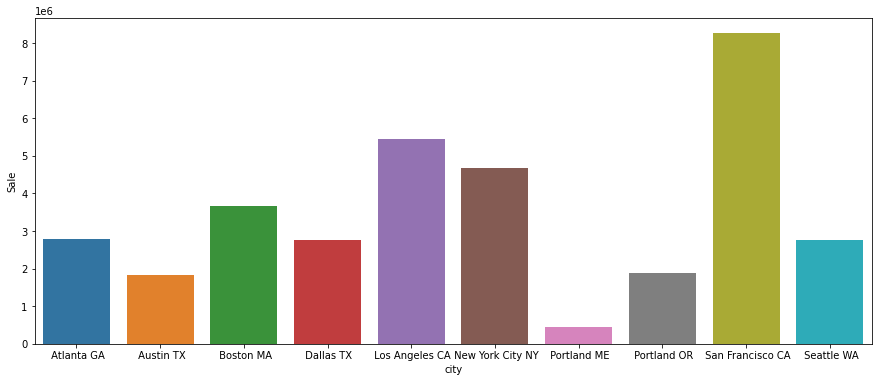

In [7]:
pd1 = new_data.groupby('city',as_index=False).sum()
plt.figure(figsize=(15,6))
sns.barplot(x='city',y='Sale',data=pd1)

**Best time to advertise so that the sales go up**

****Create a new column of hour of sale****

In [8]:
new_data.head()
new_data['time'] = new_data['Order Date'].apply(lambda x: x.split()[1])
new_data['hour'] = new_data['Order Date'].apply(lambda x: (x.split()[1]).split(":")[0])


*Group Sales by time and visualise result*

Text(0.5, 0, 'hour')

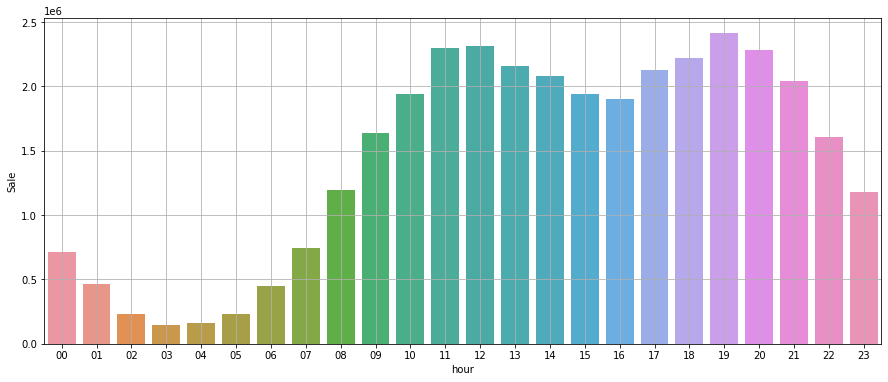

In [9]:
pd2 = new_data.groupby('hour',as_index=False).sum()

plt.figure(figsize=(15,6))
sns.barplot(x='hour',y='Sale',data=pd2)
plt.grid()
plt.xlabel('hour')

****What products usually sell together or in pairs****

*Sieve Just the duplicates from the dataframe *

In [10]:
new_data.head()
#pd3 = new_data.groupby(['Order ID'],as_index=False)
pd3=new_data[new_data['Order ID'].duplicated(keep=False)] 
pd3.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sale,city,time,hour
17,17,209938,iPhone,1,700.00,06/15/19 12:29,"766 Meadow St, Seattle, WA 98101",6.0,700.00,Seattle WA,12:29,12
18,18,209938,Wired Headphones,1,11.99,06/15/19 12:29,"766 Meadow St, Seattle, WA 98101",6.0,11.99,Seattle WA,12:29,12
29,29,209949,Google Phone,1,600.00,06/23/19 07:45,"637 12th St, San Francisco, CA 94016",6.0,600.00,San Francisco CA,07:45,07
30,30,209949,USB-C Charging Cable,1,11.95,06/23/19 07:45,"637 12th St, San Francisco, CA 94016",6.0,11.95,San Francisco CA,07:45,07
41,41,209960,USB-C Charging Cable,1,11.95,06/22/19 11:53,"333 Sunset St, Dallas, TX 75001",6.0,11.95,Dallas TX,11:53,11


Create a new column combining products sold together

In [11]:
pd3['group'] = pd3.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
pd3.head()
pd4= pd3.drop_duplicates(['group','Order ID'], keep='first')
pd4.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sale,city,time,hour,group
17,17,209938,iPhone,1,700.00,06/15/19 12:29,"766 Meadow St, Seattle, WA 98101",6.0,700.00,Seattle WA,12:29,12,"iPhone,Wired Headphones"
29,29,209949,Google Phone,1,600.00,06/23/19 07:45,"637 12th St, San Francisco, CA 94016",6.0,600.00,San Francisco CA,07:45,07,"Google Phone,USB-C Charging Cable"
41,41,209960,USB-C Charging Cable,1,11.95,06/22/19 11:53,"333 Sunset St, Dallas, TX 75001",6.0,11.95,Dallas TX,11:53,11,"USB-C Charging Cable,AA Batteries (4-pack)"
43,43,209961,iPhone,1,700.00,06/01/19 23:00,"482 South St, Austin, TX 73301",6.0,700.00,Austin TX,23:00,23,"iPhone,Lightning Charging Cable"
147,147,210064,Lightning Charging Cable,1,14.95,06/16/19 20:39,"101 Lincoln St, Atlanta, GA 30301",6.0,14.95,Atlanta GA,20:39,20,"Lightning Charging Cable,27in FHD Monitor"


Count the most frequently sold together items

In [23]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in pd4['group']:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,3)))
count.most_common(10)
for key,value in count.most_common(10):
    print(key,",",value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') , 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') , 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') , 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') , 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') , 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') , 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') , 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') , 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') , 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') , 5


***Most Successful Product from the list***

ValueError: Could not interpret input 'Price Each'

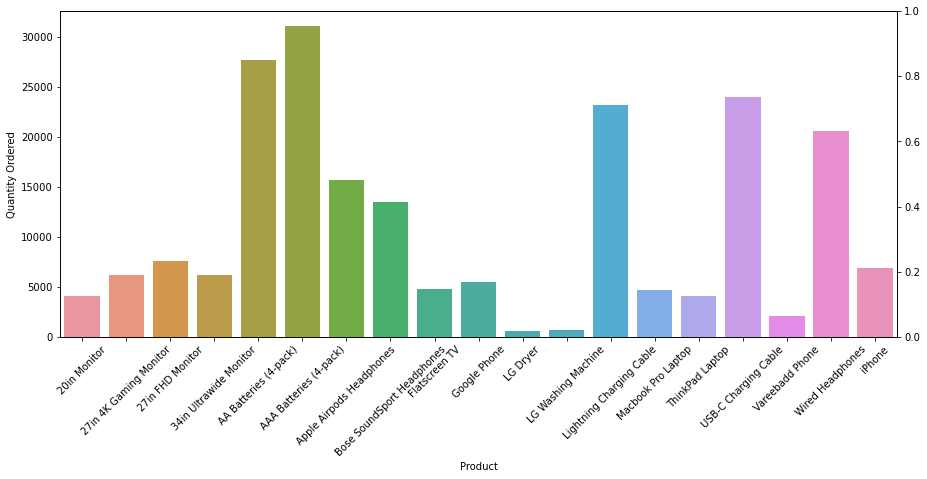

In [47]:
new_data.head()
new_data['Quantity Ordered'] = new_data['Quantity Ordered'].astype('int')
new_data['Price Each'] = new_data['Price Each'].astype('int')
pd5 = new_data.groupby('Product',as_index=False)['Quantity Ordered'].sum()
pd6 = new_data.groupby('Product',as_index=False)['Price Each'].mean()
plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
sns.barplot(x='Product',y='Quantity Ordered',data=pd5)
ax2 = plt.twinx()
sns.lineplot(x='Product',y='Price Each',data=pd6, color="b", ax=ax2)